In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import joblib

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

In [2]:
# Load model and scaler
model = joblib.load('../models/best_churn_model.joblib')
scaler = joblib.load('../models/scaler.joblib')

## Feature Importance Analysis

In [3]:
# Extract feature names from the model
feature_names = model.feature_names_in_
feature_names

array(['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract_Two year',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'Contract_One year', 'gender', 'TechSupport_Yes',
       'OnlineSecurity_Yes', 'Partner', 'PaperlessBilling'], dtype=object)

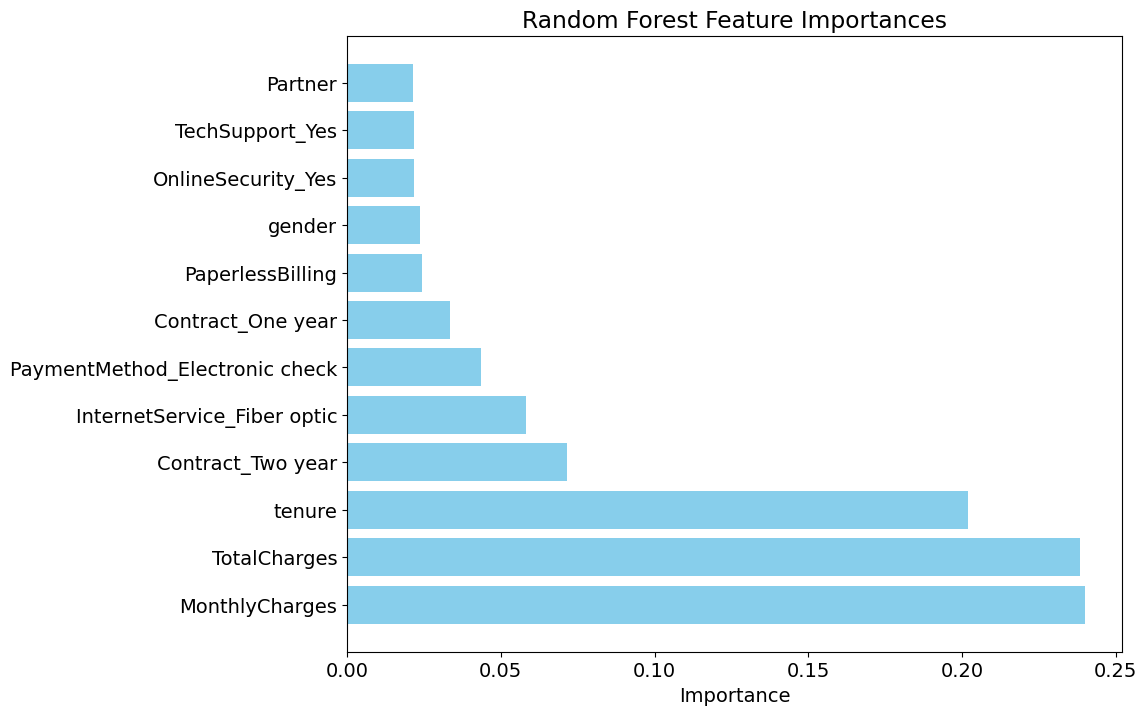

In [4]:
# Feature Importance Analysis
importances_rf = model.feature_importances_
importances_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df_rf['Feature'], importances_df_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.savefig('../plots/model_feature_importance.png', bbox_inches='tight', dpi=300)
plt.show()

In [5]:
print(importances_df_rf)

                           Feature  Importance
2                   MonthlyCharges    0.240083
1                     TotalCharges    0.238455
0                           tenure    0.201845
3                Contract_Two year    0.071425
4      InternetService_Fiber optic    0.058339
5   PaymentMethod_Electronic check    0.043445
6                Contract_One year    0.033469
11                PaperlessBilling    0.024205
7                           gender    0.023652
9               OnlineSecurity_Yes    0.021913
8                  TechSupport_Yes    0.021600
10                         Partner    0.021569



Key Findings
1. **Top Features:**

    - **MonthlyCharges (0.240083):** The amount a customer is billed monthly is the most significant predictor of churn. Higher monthly charges may lead to higher churn rates, potentially indicating price sensitivity among customers.
    - **TotalCharges (0.238455):** The total amount a customer has been billed over time is almost as important as the monthly charges. This suggests that the overall expenditure of a customer significantly impacts their likelihood to churn.
    - **Tenure (0.201845):** The length of time a customer has been with the service is also a crucial factor. Customers with longer tenures are less likely to churn, highlighting the importance of customer loyalty.

2. **Moderately Important Features:**

    - **Contract_Two year (0.071425):** Customers with a two-year contract are less likely to churn, indicating that long-term contracts help in retaining customers.
    - **InternetService_Fiber optic (0.058339):** The type of internet service also plays a role. Customers with fiber optic internet service might be more likely to churn, possibly due to higher costs or service issues.
    - **PaymentMethod_Electronic check (0.043445):** The payment method is a notable factor, with customers using electronic checks showing a higher likelihood of churn.

3. **Lesser Important Features:**

    - **Contract_One year (0.033469):** Similar to the two-year contract, one-year contracts also help reduce churn but are less effective than longer-term contracts.
    - **PaperlessBilling (0.024205):** Customers using paperless billing have a slightly lower importance score, indicating some effect on churn, perhaps related to convenience or customer preferences.
    - **Gender (0.023652):** Gender has a relatively minor impact on churn prediction.
    - **OnlineSecurity_Yes (0.021913) and TechSupport_Yes (0.021600):** Availability of online security and tech support services moderately influences churn.
    - **Partner (0.021569):** Having a partner slightly affects the likelihood of churn, potentially due to shared decision-making in household services.

## Prediction class

In [6]:
class PredictChurn():
    def __init__(self, input_data):
        self.input_data = input_data
        # Load model and scaler
        self.model = joblib.load('../models/best_churn_model.joblib')
        self.scaler = joblib.load('../models/scaler.joblib')

    def _preprocess_input(self):
        """
        Preprocess the input data by scaling specific columns.
        
        Returns:
            pd.DataFrame: Preprocessed data ready for prediction.
        """
        # Ensure the columns are in the correct order
        columns = ['tenure', 'TotalCharges', 'MonthlyCharges'] + \
                  [col for col in self.input_data.columns if col not in ['tenure', 'TotalCharges', 'MonthlyCharges']]
        data = self.input_data[columns]

        # Apply scaling to the specified columns
        data[['tenure', 'MonthlyCharges', 'TotalCharges']] = self.scaler.transform(
            data[['tenure', 'MonthlyCharges', 'TotalCharges']]
        )
        
        return data

    @property
    def predict_churn(self):
        """
        Predict churn based on the preprocessed input data.
        
        Returns:
            np.ndarray: Array of predictions (0 or 1) for churn.
        """
        # Preprocess the input data
        processed_data = self._preprocess_input()

        # Make predictions
        predictions = self.model.predict(processed_data)
        
        return predictions

In [7]:
new_data = pd.DataFrame({
        'tenure': [9, 54, 7],
        'TotalCharges': [45, 81, 42],
        'MonthlyCharges': [3831, 2320, 2957],
        'Contract_Two year': [False, True, False],
        'InternetService_Fiber optic': [True, False, True],
        'PaymentMethod_Electronic check': [True, False, False],
        'Contract_One year': [False, False, False],
        'gender': [0, 0, 0],
        'TechSupport_Yes': [False, False, False],
        'OnlineSecurity_Yes': [False, True, False],
        'Partner': [0, 0, 0],
        'PaperlessBilling': [1, 1, 0]
    })


# Create an instance of PredictChurn
predictor = PredictChurn(new_data)

# Get predictions
predictions = predictor.predict_churn
print(list(predictions))

[1, 0, 0]
